In [1]:
import pandas as pd
import numpy as np
import os
path = 'D:\Term 1\EDA\Workspace'
os.chdir(path)

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
temp = pd.read_excel('daily-minimum-temperatures.xlsx')
temp.head()

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
temp.shape

(3650, 2)

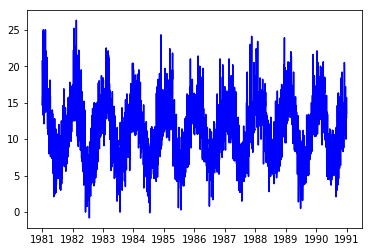

In [5]:
## Line chart analysis

plt.plot('Date','Daily minimum temperatures',data = temp, color = 'b')

In [8]:
## Creating the data set for heat map

# Step 1 : Derive Month name and year

from datetime import date
temp['Month'] = temp['Date'].dt.month_name()
temp['Year'] = temp['Date'].dt.year

# Step 2 : 

new_temp = temp.groupby(['Month','Year'])['Daily minimum temperatures'].mean().reset_index()

# Step 3 : 

new_temp_wise = new_temp.pivot(index = 'Month',columns = 'Year',values = 'Daily minimum temperatures')

# Reording of month

index_order = ['January','February','March','April','May','June','July','August','September',
               'October','November','December']
new_temp_wise = new_temp_wise.reindex(index_order)
new_temp_wise.head()

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
Month,,,,,,,,,,
January,17.712903,16.567742,13.180645,14.309677,14.219355,13.825806,13.235484,16.493548,15.180645,15.577419
February,17.678571,15.921429,16.807143,14.944828,14.032143,14.196429,13.889286,14.524138,16.371429,15.417857
March,13.500000,14.935484,15.777419,12.867742,15.877419,14.690323,12.619355,14.748387,15.803226,14.835484
April,12.356667,11.470000,10.596667,10.750000,12.976667,11.653333,12.250000,12.833333,12.563333,13.433333
May,9.490323,9.583871,10.116129,8.112903,9.419355,10.274194,9.806452,11.387097,10.725806,9.748387


In [33]:
import seaborn as sns

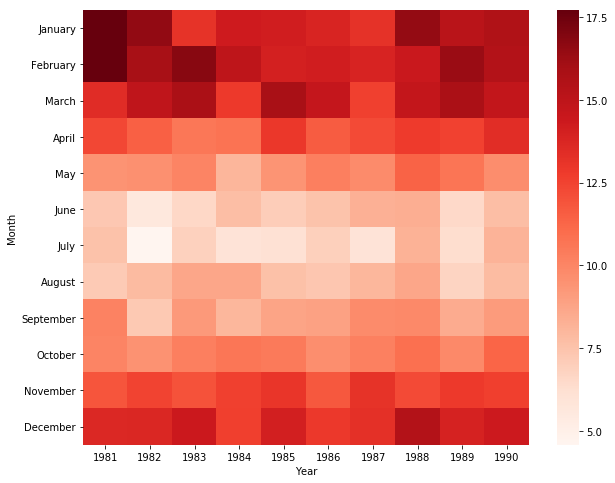

In [35]:
sns.heatmap(new_temp_wise,cmap='Reds')

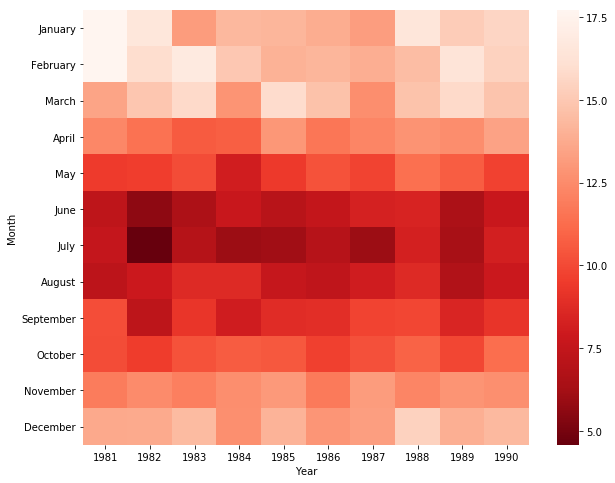

In [36]:
sns.heatmap(new_temp_wise,cmap='Reds_r')

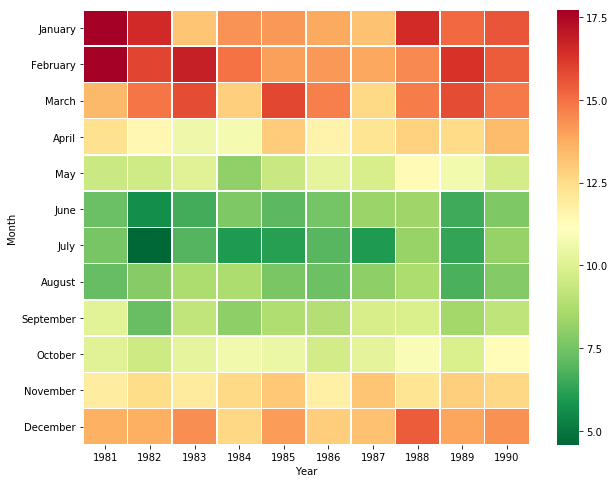

In [39]:
sns.heatmap(new_temp_wise,cmap='RdYlGn_r',linewidths=0.5)

In [47]:
temp['Each_date'] = temp['Date'].dt.day
# Step 2 : 

day_temp = temp.groupby(['Month','Each_date'])['Daily minimum temperatures'].mean().reset_index()

# Step 3 : 

day_temp_wise = day_temp.pivot(index = 'Month',columns = 'Each_date',values = 'Daily minimum temperatures')

# Reording of month

index_order = ['January','February','March','April','May','June','July','August','September',
               'October','November','December']
day_temp_wise = day_temp_wise.reindex(index_order)
day_temp_wise.head()

Each_date,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
January,15.85,15.28,14.69,14.04,13.85,13.66,14.75,14.92,15.19,15.45,...,14.11,14.16,14.53,14.80,14.99,14.99,14.79,15.69,16.31,14.79
February,15.09,13.99,14.53,15.55,14.22,14.73,15.36,17.03,16.41,14.71,...,15.60,14.57,13.83,14.54,14.46,15.18,16.06,14.90,NaN,NaN
March,16.04,15.96,15.28,15.82,16.36,16.50,15.28,15.36,14.25,13.64,...,15.44,15.16,14.57,13.08,13.43,13.54,13.24,13.12,13.93,13.44
April,13.43,13.05,13.12,13.69,14.25,13.62,13.06,11.61,11.80,12.03,...,11.53,11.10,11.73,11.21,10.05,11.72,11.78,10.88,10.73,NaN
May,11.23,11.83,11.36,11.67,11.39,11.43,9.85,9.64,9.55,11.01,...,7.41,9.06,10.00,9.47,9.44,8.90,9.59,10.01,9.83,9.08


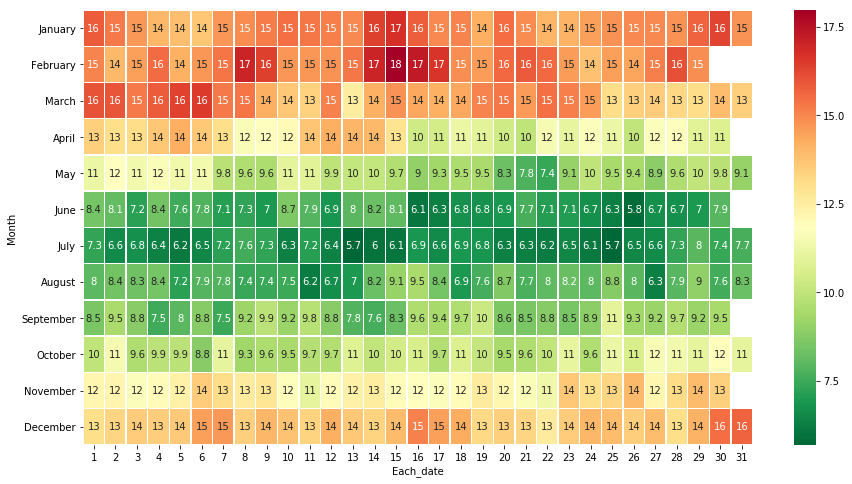

In [51]:
sns.heatmap(day_temp_wise,cmap='RdYlGn_r',linewidths=0.5,annot = True)